# Local Model Serving with MLflow

In [2]:
import httpx 
import pandas as pd
import mlflow
from examples.walmart_sales_regression.data import SalesDataProcessor
from examples.utils.file_utils import get_root_dir
from examples.utils.file_utils import read_file

# set mlflow tracking uri
mlflow.set_tracking_uri(uri=(get_root_dir() / 'mlruns').as_uri())

```shell
mlflow models serve --options
```

To run the code below make sure you deploy the model using.

`poetry run mlflow models serve -m models:/walmart-store-sales-regressor@production --env-manager local`

In [3]:
root_dir = get_root_dir()
configs = read_file(
    root_dir / "examples" / "walmart_sales_regression" / "configs.yaml"
)
registered_model_name = configs["registered_model_name"]

data_path = (
    root_dir.parents[1] / "Downloads" / "sales-walmart" / "Walmart_Sales.csv"
)  # change this to your data path

data_processor = SalesDataProcessor(path=data_path, configs=configs)

url = "http://localhost:5000/invocations"

_, x_test, _, y_test = data_processor.create_train_test_split()

# predicting for the store store_id
store_id = 3
x_test = x_test[x_test["Store"] == store_id]
y_test = y_test[y_test["Store"] == store_id]

payload = {
    "dataframe_split": x_test.to_dict(orient="split"),
    "params": {"store_id": str(store_id)},
}
headers = {"Content-Type": "application/json"}
response = httpx.post(url, json=payload, headers=headers)

In [4]:
response.json()

{'predictions': [438231.07470000023,
  449671.0592999996,
  481317.7462999999,
  412549.75080000004,
  359065.03290000034,
  357137.44370000006,
  401040.7825999999,
  365080.29209999996,
  426820.53999999986,
  414350.3652000001,
  436016.0663,
  386800.3361999999,
  358548.6156000001,
  502410.9041000001,
  359910.68860000034,
  430017.7614999999,
  429208.22860000026,
  401300.60270000034,
  421535.29830000014,
  375816.50049999997,
  456559.8088000002,
  405502.1313000003,
  371199.6689000001,
  375305.62780000025,
  416671.50179999997,
  414480.39760000026,
  350386.15210000024,
  367982.54329999984,
  403696.7750000002,
  377000.2318999999,
  427763.0093999999,
  409313.39350000006,
  413590.04560000025,
  422966.3920000001,
  371594.5920999997]}

<Axes: >

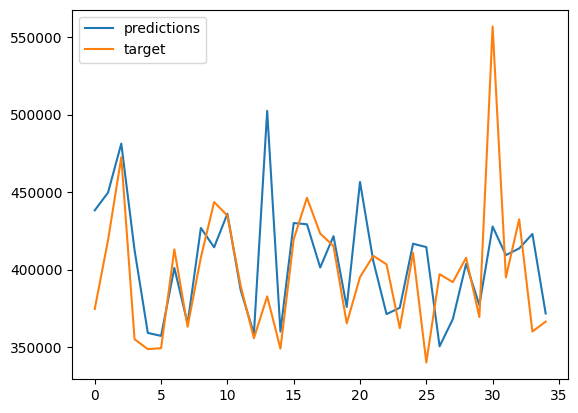

In [5]:
pd.DataFrame({
    "predictions": response.json()["predictions"],    
    "target": y_test["Weekly_Sales"].values,
}).plot()